In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
plt.rcParams['figure.figsize'] = (10.0,8.0)
%matplotlib inline
sns.set(style="whitegrid")

In [62]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Train has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print('Test has {} rows and {} columns'.format(test.shape[0],test.shape[1]))
train.head()

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [79]:
miss = train.isnull().sum()*100/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

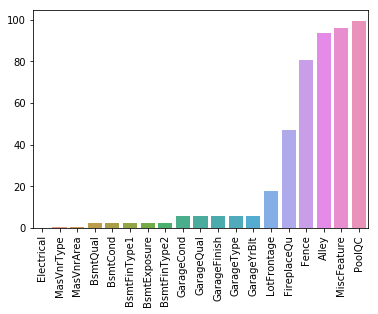

In [84]:
sns.barplot(x=miss.index,y=miss.values)
plt.xticks(rotation=90)

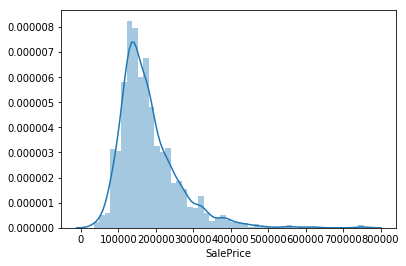

In [95]:
sns.distplot(train['SalePrice'])

In [98]:
target = train['SalePrice']
target = np.log(target)

Skewness is 0.12133506220520406


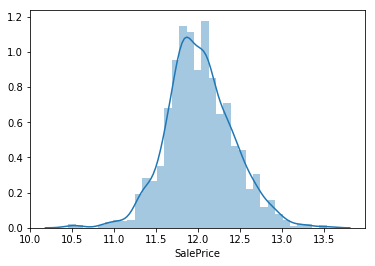

In [100]:
print('Skewness is {}'.format(target.skew()))
sns.distplot(target)

In [89]:
num_data = train.select_dtypes(include=np.number)
del num_data['Id']
num_cols = num_data.columns
cat_data = train.select_dtypes(exclude=np.number)
cat_cols = cat_data.columns
print('Numeric columns are {}'.format(num_data.shape[1]))
print('Categorical columns are {}'.format(cat_data.shape[1]))

Numeric columns are 37
Categorical columns are 43


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
Name: SalePrice, dtype: float64


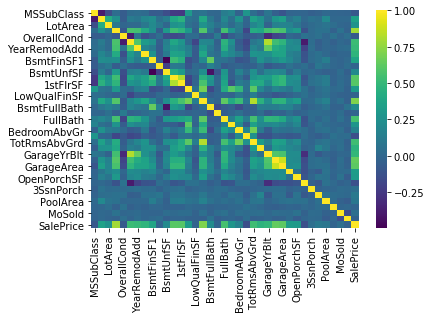

In [104]:
corr = num_data.corr()
print(corr[corr['SalePrice'] > 0.2]['SalePrice'].sort_values(ascending=False))
sns.heatmap(corr, cmap='viridis')

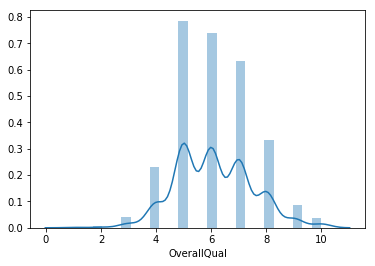

In [105]:
sns.distplot(train['OverallQual'])

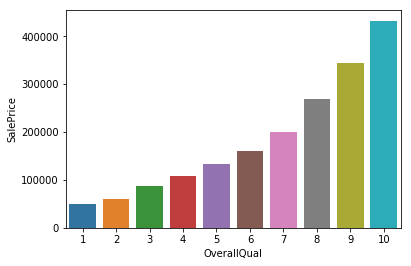

In [117]:
g1 = train[['OverallQual','SalePrice']].groupby(by='OverallQual').median()
sns.barplot(x=g1.index,y=g1['SalePrice'])

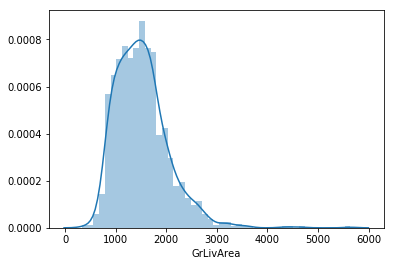

In [118]:
sns.distplot(train['GrLivArea'])

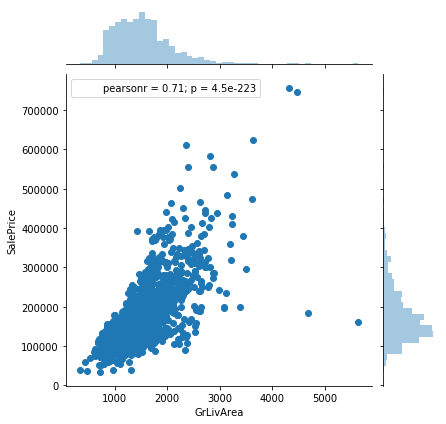

In [120]:
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'])

# Lets explore categorical variables now

In [140]:
def anova(data):
    anv = pd.DataFrame()
    anv['features'] = cat_colms
    pvals=[]
    for col in cat_colms:
        sr = data[col]
        samples = []
        for cls in sr.unique():
            s = data[data[col] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    anv['disparity'] = np.log(1/anv['pval'])
    return anv.sort_values('pval')

C:\Users\arora ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\arora ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:2916: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


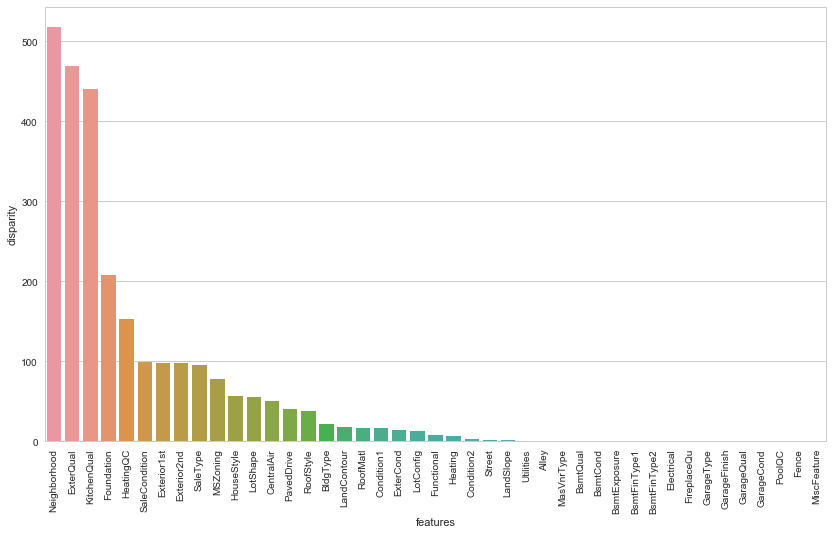

['Neighborhood' 'ExterQual' 'KitchenQual' 'Foundation' 'HeatingQC']


In [157]:
cat_data['SalePrice'] = train['SalePrice']
anv = anova(cat_data)
plt.figure(figsize=(14,8))
sns.barplot(x=anv['features'], y=anv['disparity'])
plt.xticks(rotation=90)
plt.show()
print(anv.sort_values('disparity',ascending=False)['features'].values[:5])

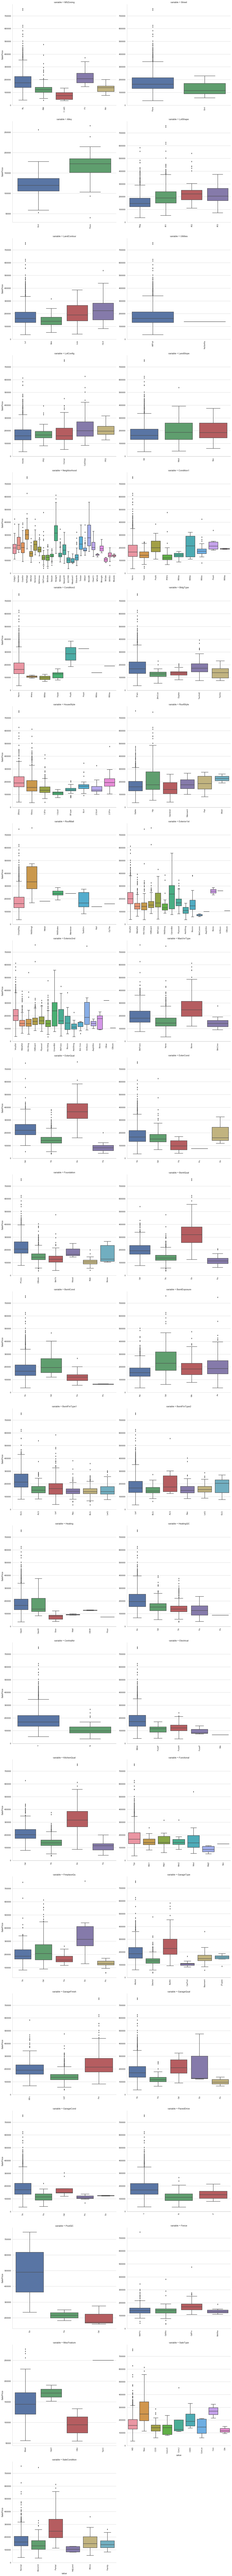

In [188]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    plt.xticks(rotation=90)
    
p = pd.melt(train,id_vars='SalePrice',value_vars=cat_cols)
g = sns.FacetGrid(p, col='variable',col_wrap=2,sharex=False, sharey=False,size=8)
g = g.map(boxplot,'value','SalePrice')
g